# Melbourne Housing Seasonality Analysis

**Goal:**  
Explore how Melbourne housing prices vary across months and seasons to understand whether certain periods offer more affordable buying opportunities.

**Dataset:**  
melb_data.csv (Melbourne housing market data sourced from Domain.com)

**Key Questions**
- Do housing prices differ between months?
- Are some seasons noticeably cheaper or more expensive?
- Does weekday vs weekend selling impact price?
- Can we model monthly patterns using simple regression?

**Tech Stack:**  
Python, pandas, NumPy, Matplotlib, Seaborn  


This research question will explore how housing prices vary throughout the year. It is suspected that prices are not consistent across months and that seasonal trends play a huge role. It is also anticipated that these patterns will be linked to key events like the holiday season, the end of financial year, and more. The relationship between housing supply on the market and housing prices will also be explored during this analysis.


The goal of this analysis is to use real housing data to identify when prices tend to be lower or higher throughout the year. By spotting these patterns and understanding the factors behind them, this research will provide useful and data-backed insights.


Ultimately, this analysis aims to guide first time home buyers in making smarter decisions about timing their entry into the real estate market.

## 1. Understanding the Data

This dataset includes a wide range of Melbourne housing sales.  
For this project, we are specifically focused on:

- `Price` — selling price  
- `Date` — sale date  
- Time-based features extracted from `Date`  

## 2. Importing Libraries and Setting Up the Environment

In [1]:
# Load libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import calendar

## 3. Loading the Melbourne Housing Dataset

In [3]:
housing = pd.read_csv("melb_data.csv")
housing.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [3]:
# Data shape
housing.shape

(13580, 21)

## 4. Extracting Month Information and Analysing Price by Month

We extract the sale month and compute the average price for each month to see if housing prices follow a monthly pattern.

In [3]:
# Convert housing data to pandas DataFrame
df = pd.DataFrame(data=housing, columns=['Price', 'Date'])

# Extracting month from date
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Month'] = df['Date'].dt.month

# Calculate the monthly average housing prices
monthly_avg = df.groupby('Month')['Price'].mean().reset_index()

# Check for missing values
missing_values = df.isnull().sum()

# Get descriptive statistics
descriptive_stats = df.describe()

# Display results
print("Missing values:\n",missing_values)
print("\nDescriptive statistics:\n",descriptive_stats)

Missing values:
 Price    0
Date     0
Month    0
dtype: int64

Descriptive statistics:
               Price                           Date         Month
count  1.358000e+04                          13580  13580.000000
mean   1.075684e+06  2017-01-28 20:25:03.622974976      7.052283
min    8.500000e+04            2016-01-28 00:00:00      1.000000
25%    6.500000e+05            2016-09-10 00:00:00      5.000000
50%    9.030000e+05            2017-03-04 00:00:00      7.000000
75%    1.330000e+06            2017-06-24 00:00:00      9.000000
max    9.000000e+06            2017-09-23 00:00:00     12.000000
std    6.393107e+05                            NaN      2.536034


There are no missing values from the price or date columns/variables. Hence, the data is ready for analysis.

In [4]:
# Find correlation between month and average housing price
corr = monthly_avg.corr(numeric_only=True)
print("\nCorrelation between Month and Average Price:\n", corr)


Correlation between Month and Average Price:
           Month     Price
Month  1.000000  0.318746
Price  0.318746  1.000000


The correlation coefficient between average housing price by month is 0.3187 which is relatively low, suggesting a weak relationship between the two variables. 

### Average Housing Price by Month

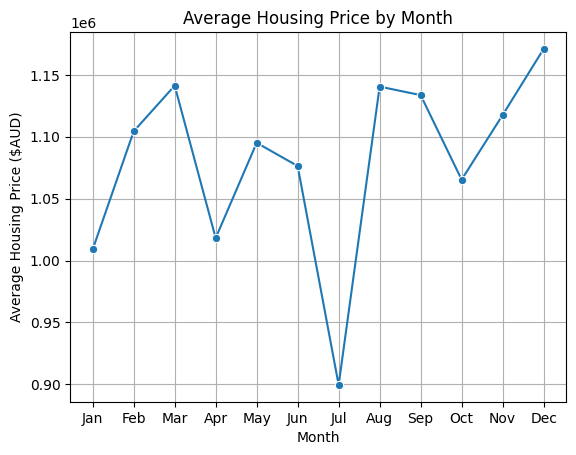

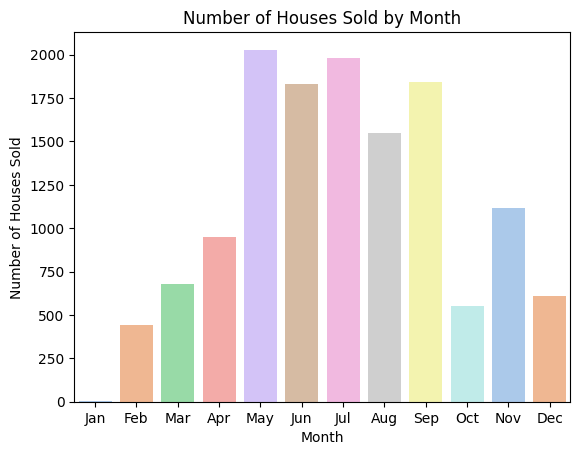

In [6]:
# Plot line graph of monthly average housing prices against month
sns.lineplot(data=monthly_avg, x='Month', y='Price', marker='o')
plt.title('Average Housing Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Housing Price ($AUD)')
plt.grid(True)

# Update x-axis to show month names instead of numbers
month_labels = [calendar.month_abbr[i] for i in range(1, 13)]
plt.xticks(ticks=range(1, 13), labels=month_labels)
plt.show()

# Calculate the number of sales each month
monthly_sales = df['Month'].value_counts().sort_index().reset_index(name='Number_of_Sales')
monthly_sales.columns = ['Month', 'Number_of_Sales']

# Plot bar graph of monthly average housing prices against month
sns.barplot(data=monthly_sales, x='Month', y='Number_of_Sales', hue='Month', palette='pastel', legend=False)
plt.title('Number of Houses Sold by Month')
plt.xlabel('Month')
plt.ylabel('Number of Houses Sold')

# Update x-axis to show month names instead of numbers
month_labels = [calendar.month_abbr[i] for i in range(1, 13)]
plt.xticks(ticks=range(len(month_labels)), labels=month_labels)
plt.show()

**Observation:**  
- Prices dip around April and July.  
- A noticeable peak appears in December.  

## 5. Grouping Prices by Season

We map each month to an Australian season and compute average prices per season.

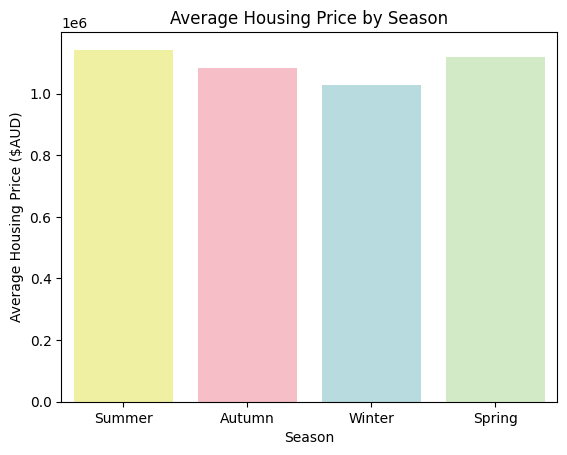

In [5]:
# Create function to sort months into seasons
def get_season(month):
    """
    Sort months into seasons and return corresponding season

    Args:
        month (str): A string representing the month 
    """
    if month in [12, 1, 2]:
        return 'Summer'
    elif month in [3, 4, 5]:
        return 'Autumn'
    elif month in [6, 7, 8]:
        return 'Winter'
    else:
        return 'Spring'

# Create new column of seasons
df['Season'] = df['Month'].apply(get_season)

# Calculate the seasonal average housing prices
seasonal_avg = df.groupby('Season')['Price'].mean().reset_index()

# Plot bar graph of monthly average housing prices against season
custom_colors = {
    'Summer': '#FDFD96',
    'Autumn': '#FFB6C1',
    'Winter': '#B0E0E6',
    'Spring': '#D0F0C0'
}

sns.barplot(data=seasonal_avg, x='Season', y='Price', order=['Summer', 'Autumn', 'Winter', 'Spring'], hue='Season' ,palette=custom_colors)
plt.title('Average Housing Price by Season')
plt.xlabel('Season')
plt.ylabel('Average Housing Price ($AUD)')
plt.show()

**Observation:**  
- Winter appears to be the cheapest season overall, with higher prices in Spring and Summer.


## 6. Weekday vs Weekend Price Differences

We compare prices of properties sold during weekdays vs weekends to check if auction days create price differences.

Text(0.5, 0, 'Day Type')

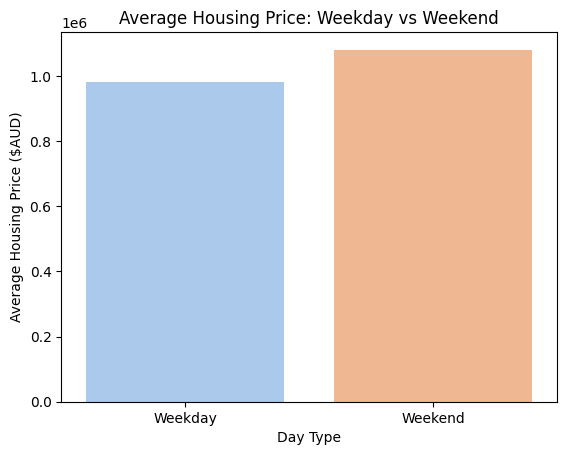

In [7]:
# Extract day of week from date and categorise into weekday and weekend
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['DayType'] = df['DayOfWeek'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Calculate the average housing prices
average_prices = df.groupby('DayType')['Price'].mean().reset_index()

# Plot bar graph of average housing prices against day type
sns.barplot(data=average_prices, x='DayType', y='Price', hue='DayType', palette='pastel', legend=False)
plt.title('Average Housing Price: Weekday vs Weekend')
plt.ylabel('Average Housing Price ($AUD)')
plt.xlabel('Day Type')

Text(0.5, 0, 'Day Type')

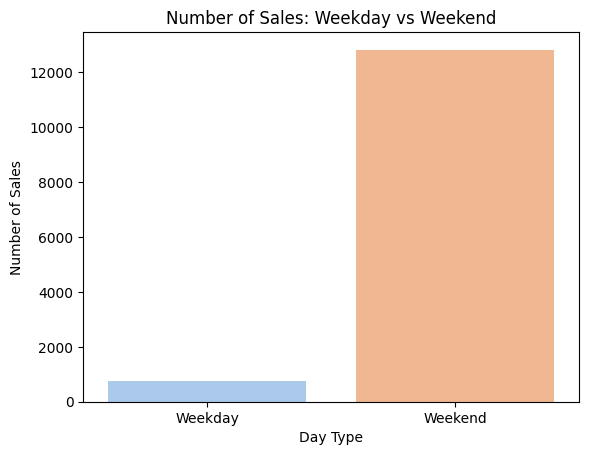

In [8]:
# Calculate the number of sales
sales_count = df.groupby('DayType').size().reset_index(name='Number of Sales')

# Plot bar graph of number of sales against day type
sns.barplot(data=sales_count, x='DayType', y='Number of Sales', hue='DayType', palette='pastel', legend=False)
plt.title('Number of Sales: Weekday vs Weekend')
plt.ylabel('Number of Sales')
plt.xlabel('Day Type')

**Observation:**  
- Weekend sales show a slightly higher average price, likely due to competitive auction bidding.
- Weekend sales are much higher in volume, likely due to auctions and inspection more typically being held on Saturdays thus leading to concentrated market activity.

## 7. Modelling the Trend with Polynomial Regression

A 2nd-order (quadratic) regression is fitted to capture the overall curved pattern in average monthly prices.

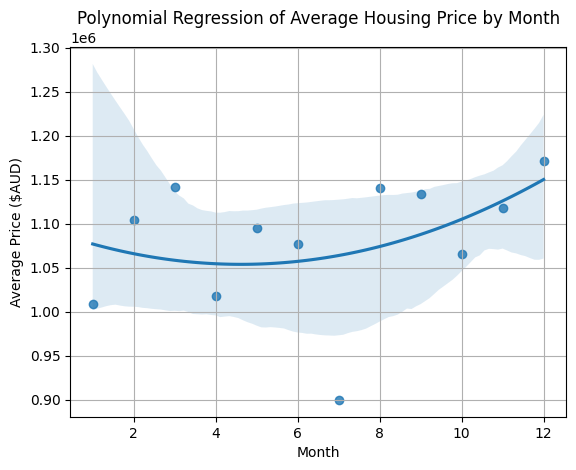

In [9]:
# Plot the polynomial regression (quadratic)
sns.regplot(data=monthly_avg, x='Month', y='Price', order=2)

plt.title('Polynomial Regression of Average Housing Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Price ($AUD)')
plt.grid(True)

**Observation:**  
The fitted curve shows a U-shaped pattern, supporting the visual trend:
- Lower prices mid-year  
- Higher prices at the start and end of the year

# 8. Conclusion

### Key Findings
- **Cheapest months:** April and July  
- **Most expensive month:** December  
- **Cheapest season:** Winter  
- **Weekend sales** tend to be priced slightly higher due to auctions.

### What This Means for First-Home Buyers
- Mid-year (especially winter) offers the best chance of lower prices.
- End-of-year prices surge, likely due to increased buyer activity.
- Weekends often produce competitive bidding environments.

### Limitations
- Does not include features like location, property type, or size.
- This is not a predictive model — only an exploratory seasonal analysis.
- Data reflects only the year(s) in the dataset.

### Future Work
- Multivariable regression controlling for property characteristics.
- Time-series decomposition (trend, seasonality, residuals).
- Comparison across multiple years or Australian cities.
